# <u>Imports</u>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import date, datetime, timedelta

# <u>Data Analysis</u>
## Original Data Import

In [2]:
vmtable = pd.read_csv('D:/FYP/AzureDatasetPacking2019/VM Table/vmtable.csv.gz', compression='gzip', 
                      names=['vm id', 'subscription id', 'deployment id', 'timestamp vm created', 'timestamp vm deleted', 
                             'max cpu', 'avg cpu', 'p95 max cpu', 'vm category', 'vm virtual core count', 
                             'vm memory (gb)'], sep=',', quotechar='"')

In [10]:
vmtable.head()

,vm id,subscription id,deployment id,timestamp vm created,timestamp vm deleted,max cpu,avg cpu,p95 max cpu,vm category,vm virtual core count,vm memory (gb)
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2591700,99.369869,3.424094,10.194309,Delay-insensitive,1,1.75
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75


In [3]:
cpu_readings1 = pd.read_csv('D:/FYP/AzureDatasetPacking2019/VM CPU Readings/vm_cpu_readings-file-1-of-125.csv.gz', 
                           compression='gzip', names=['timestamp', 'vm id', 'min cpu', 'max cpu', 'avg cpu'], 
                           sep=',', quotechar='"')
cpu_readings1.head()

,timestamp,vm id,min cpu,max cpu,avg cpu
0,0,+ZcrOp5/c/fJ6mVgP5qMZlOAGDwyjaaDNM0WoWOt2IDb47...,2.052803,3.911587,2.869790
1,0,2zrgeOqUDy+l0GVi5NXudU+3sqZH+nLowfcz+D/JsCymTX...,1.646950,8.794403,3.254472
2,0,/34Wh1Kq/qkNkW0tQrMiQ1eZ8hg9hHopydCzsXriefhgrn...,2.440088,6.941048,4.336240
3,0,2lzdXk1Rqn1ibH2kZhGamYTMvVcRP6+x8b5zGiD/8t++5B...,0.302992,2.046712,0.970692
4,0,0GrUQuLhCER5bWWcoJAgblPJWkaU4v3nf+NUrZnFTlXWEK...,1.515922,4.471657,2.438805


## Aggregated Data Import

In [2]:
aggregated_vmtable = pd.read_csv("D:/FYP/AzureDatasetPacking2019/Aggregated Data/aggregated_vmtable_correct_dates.csv")

In [3]:
aggregated_vmtable = aggregated_vmtable[:-1] # delete last row of zeros

In [4]:
aggregated_vmtable['index']= pd.to_datetime(aggregated_vmtable['index'])

In [5]:
aggregated_vmtable = aggregated_vmtable.set_index("index")
aggregated_vmtable.head()

,avg_cpu,max_cpu,p95_max_cpu,vm_virtual_core_count,vm_memory_gb
index,,,,,
2016-11-16 00:00:00,600026.793129,4.041458e+06,2.139499e+06,126757,335558.00
2016-11-16 00:05:00,600971.042478,4.044738e+06,2.141563e+06,126712,335395.25
2016-11-16 00:10:00,600301.813291,4.042657e+06,2.139025e+06,126516,334882.25
2016-11-16 00:15:00,599839.457380,4.042293e+06,2.138133e+06,126402,334636.75
2016-11-16 00:20:00,598782.239829,4.041869e+06,2.136908e+06,126265,334311.00


In [4]:
aggregated_cpu_readings = pd.read_csv("D:/FYP/AzureDatasetPacking2019/Aggregated Data//aggregated_cpu_readings_correctdates.csv")

In [5]:
aggregated_cpu_readings['datetime']= pd.to_datetime(aggregated_cpu_readings['datetime'])
aggregated_cpu_readings = aggregated_cpu_readings.set_index("datetime")
aggregated_cpu_readings.head()

,avg cpu,max cpu
datetime,,
2016-11-16 00:00:00,1.229569e+06,2.223302e+06
2016-11-16 00:05:00,1.211322e+06,2.212393e+06
2016-11-16 00:10:00,1.206635e+06,2.213057e+06
2016-11-16 00:15:00,1.190369e+06,2.187572e+06
2016-11-16 00:20:00,1.180992e+06,2.183684e+06


In [8]:
print(min(aggregated_cpu_readings.index), max(aggregated_cpu_readings.index))
print(min(aggregated_vmtable.index), max(aggregated_vmtable.index))

2016-11-16 00:00:00 2016-12-15 23:55:00
2016-11-16 00:00:00 2016-12-15 23:50:00


### Join Aggregated Data

In [9]:
all_data = aggregated_cpu_readings.join(aggregated_vmtable)

In [10]:
all_data = all_data.rename(columns={'avg cpu': 'avg cpu reading', 'avg_cpu': 'avg cpu VMTable',
                                    'max cpu': 'max cpu reading', 'max_cpu': 'max cpu VMTable',
                                    'vm_virtual_core_count': 'core count', 'vm_memory_gb': 'memory (gb)'})
all_data.head()

,avg cpu reading,max cpu reading,avg cpu VMTable,max cpu VMTable,p95_max_cpu,core count,memory (gb)
datetime,,,,,,,
2016-11-16 00:00:00,1.229569e+06,2.223302e+06,600026.793129,4.041458e+06,2.139499e+06,126757.0,335558.00
2016-11-16 00:05:00,1.211322e+06,2.212393e+06,600971.042478,4.044738e+06,2.141563e+06,126712.0,335395.25
2016-11-16 00:10:00,1.206635e+06,2.213057e+06,600301.813291,4.042657e+06,2.139025e+06,126516.0,334882.25
2016-11-16 00:15:00,1.190369e+06,2.187572e+06,599839.457380,4.042293e+06,2.138133e+06,126402.0,334636.75
2016-11-16 00:20:00,1.180992e+06,2.183684e+06,598782.239829,4.041869e+06,2.136908e+06,126265.0,334311.00


### Normalised data

In [3]:
avg_cpu = pd.read_csv("C:/Users/user/OneDrive - University College Cork/UCC/Year 4/FYP/Normalised Data/avg_cpu_norm.csv")
avg_cpu_readings = pd.read_csv("C:/Users/user/OneDrive - University College Cork/UCC/Year 4/FYP/Normalised Data/avg_cpu_reading_norm.csv")
max_cpu = pd.read_csv("C:/Users/user/OneDrive - University College Cork/UCC/Year 4/FYP/Normalised Data/max_cpu_norm.csv")
max_cpu_readings = pd.read_csv("C:/Users/user/OneDrive - University College Cork/UCC/Year 4/FYP/Normalised Data/max_cpu_reading_norm.csv")
memory = pd.read_csv("C:/Users/user/OneDrive - University College Cork/UCC/Year 4/FYP/Normalised Data/memory_norm.csv")
core_count = pd.read_csv("C:/Users/user/OneDrive - University College Cork/UCC/Year 4/FYP/Normalised Data/corecount_norm.csv")

In [4]:
avg_cpu = avg_cpu[["index", "avg_cpu"]].set_index("index")
avg_cpu_readings = avg_cpu_readings[["datetime", "avg cpu"]].set_index("datetime")
max_cpu = max_cpu[["index", "max_cpu"]].set_index("index")
max_cpu_readings = max_cpu_readings[["datetime", "max cpu"]].set_index("datetime")
memory = memory[["index", "vm_memory_gb"]].set_index("index")
core_count = core_count[["index", "vm_virtual_core_count"]].set_index("index")

In [5]:
normalised_data = avg_cpu.join(avg_cpu_readings) 
normalised_data = normalised_data.join(max_cpu)
normalised_data = normalised_data.join(max_cpu_readings)
normalised_data = normalised_data.join(memory)
normalised_data = normalised_data.join(core_count)

In [6]:
normalised_data = normalised_data.rename(columns={'avg cpu': 'avg cpu reading', 'avg_cpu': 'avg cpu VMTable',
                                    'max cpu': 'max cpu reading', 'max_cpu': 'max cpu VMTable',
                                    'vm_virtual_core_count': 'core count', 'vm_memory_gb': 'memory (gb)'})

In [7]:
normalised_data.head()

,avg cpu VMTable,avg cpu reading,max cpu VMTable,max cpu reading,memory (gb),core count
index,,,,,,
2016-11-16 04:10:00,0.619215,0.542980,0.367084,0.534176,0.549282,0.531712
2016-11-16 04:15:00,0.623074,0.520814,0.370815,0.522917,0.553106,0.535997
2016-11-16 04:20:00,0.622104,0.502810,0.366522,0.511465,0.555369,0.536426
2016-11-16 04:25:00,0.630831,0.559862,0.377687,0.563148,0.566006,0.548211
2016-11-16 04:30:00,0.667159,0.439312,0.426965,0.467785,0.584359,0.561174


###  <i>Feature Correlation</i>

In [21]:
normalised_data.diff().corr().style.background_gradient(cmap='plasma')

,avg cpu VMTable,avg cpu reading,max cpu VMTable,max cpu reading,memory (gb),core count
avg cpu VMTable,1.000000,0.064669,0.933544,-0.032520,0.577597,0.700456
avg cpu reading,0.064669,1.000000,0.068789,0.613477,0.017838,0.028841
max cpu VMTable,0.933544,0.068789,1.000000,-0.025163,0.706726,0.820688
max cpu reading,-0.032520,0.613477,-0.025163,1.000000,-0.040466,-0.037602
memory (gb),0.577597,0.017838,0.706726,-0.040466,1.000000,0.894239
core count,0.700456,0.028841,0.820688,-0.037602,0.894239,1.000000


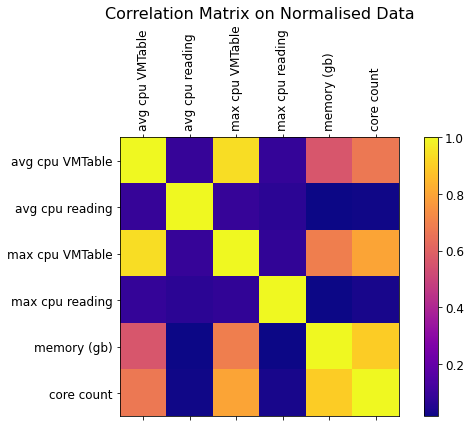

In [22]:
f = plt.figure(figsize=(9, 5))
plt.matshow(normalised_data.corr(), fignum=f.number, cmap="plasma")
plt.xticks(range(normalised_data.select_dtypes(['number']).shape[1]), list(normalised_data.columns), fontsize=12, rotation=90)
plt.yticks(range(normalised_data.select_dtypes(['number']).shape[1]), list(normalised_data.columns), fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix on Normalised Data', fontsize=16);
plt.savefig('C:\\Users\\user\\OneDrive - University College Cork\\UCC\\Year 4\\FYP\\Final Report\\Graphics\\norm_data_correlation.png')

### <i>Memory & Core Count per VM</i>

In [25]:
vmtable["vm memory (gb)"].value_counts().sort_index(ascending=True)

0.75       44408
1.75      960042
2.00         543
3.50      498769
4.00         289
7.00      226595
8.00          68
14.00     205582
16.00        188
28.00       1879
32.00         41
56.00      75029
64.00          8
112.00       326
Name: vm memory (gb), dtype: int64

In [26]:
vmtable["vm virtual core count"].value_counts()

1     1004993
2      500208
8      279657
4      228583
16        326
Name: vm virtual core count, dtype: int64

In [27]:
memory_labels = np.unique(vmtable["vm memory (gb)"])
core_labels = [1, 2, 4, 8, 16]

In [63]:
colours1 = ["b", "blueviolet", "yellow", "cornflowerblue", "indigo", "orange", "teal", "darkmagenta", "darkseagreen", "aqua", "grey", "white", "purple", "green"]
colours2 = ["b", "blueviolet", "orange", "cornflowerblue", "indigo",]

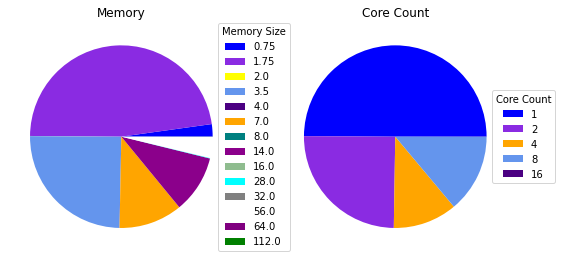

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))

color1, texts = ax1.pie(vmtable["vm memory (gb)"].value_counts().sort_index(ascending=True), colors=colours1)
ax1.set_title("Memory")
ax1.legend(color1, memory_labels,
          title="Memory Size",
          loc="center left",
          bbox_to_anchor=(.9, 0, 0, 1))
color2, texts2 = ax2.pie(vmtable["vm virtual core count"].value_counts().sort_index(ascending=True), colors=colours2)
ax2.set_title("Core Count")
ax2.legend(color2, core_labels,
          title="Core Count",
          loc="center left",
          bbox_to_anchor=(.9, 0, 0, 1))
plt.show()

### <i>VM Lifetime Analysis</i>

In [9]:
vmtable['lifetime'] = (vmtable['timestamp vm deleted'] - vmtable['timestamp vm created'])/60

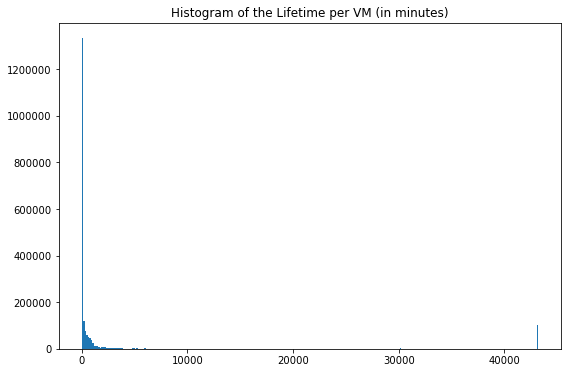

In [68]:
plt.figure(figsize=(9,6))
plt.hist(vmtable['lifetime'], bins=300)
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Histogram of the Lifetime per VM (in minutes)')
plt.show()

In [69]:
min_vmtable = vmtable[vmtable['lifetime']<=1000]

In [70]:
round(len(vmtable['lifetime'])*0.9)

1812390

1868839.0

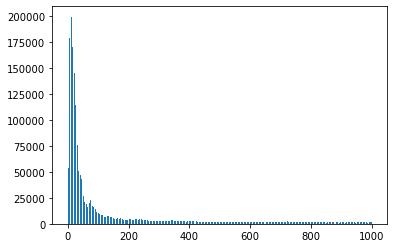

In [96]:
count = plt.hist(min_vmtable["lifetime"], bins=300)
c = count[1].sum() + count[0].sum()
c

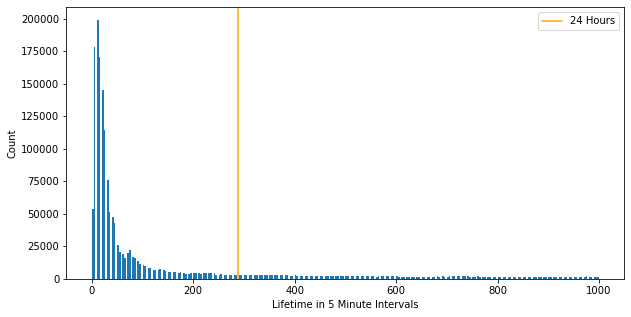

In [109]:
plt.figure(figsize=(10,5))
plt.hist(min_vmtable["lifetime"], bins=300)
plt.axvline(x = (24*60)/5, color = 'orange', label="24 Hours")
plt.ylabel("Count")
plt.xlabel("Lifetime in 5 Minute Intervals")
plt.legend()
plt.show()

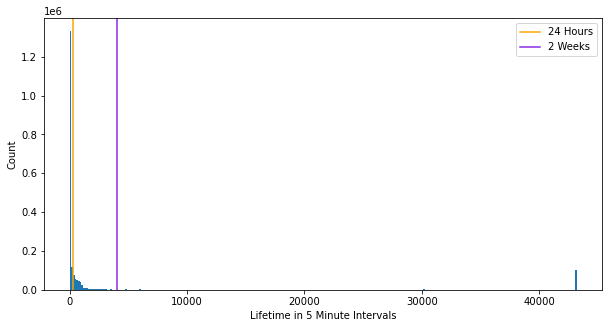

In [11]:
plt.figure(figsize=(10,5))
plt.hist(vmtable["lifetime"], bins=300)
plt.axvline(x = (24*60)/5, color = 'orange', label="24 Hours")
plt.axvline(x = (24*14*60)/5, color = 'blueviolet', label="2 Weeks")
plt.ylabel("Count")
plt.xlabel("Lifetime in 5 Minute Intervals")
plt.legend()
plt.show()

### <i>Calendar Analysis</i>

In [6]:
aggregated_cpu_readings.sort_values(by=['max cpu'], ascending=False).head()

,avg cpu,max cpu
datetime,,
2016-12-11 17:15:00,1.687763e+06,3.529173e+06
2016-11-18 10:55:00,1.573917e+06,3.415854e+06
2016-12-11 17:10:00,1.656147e+06,3.349875e+06
2016-11-25 07:45:00,1.448361e+06,3.273199e+06
2016-11-18 10:50:00,1.520624e+06,3.242427e+06


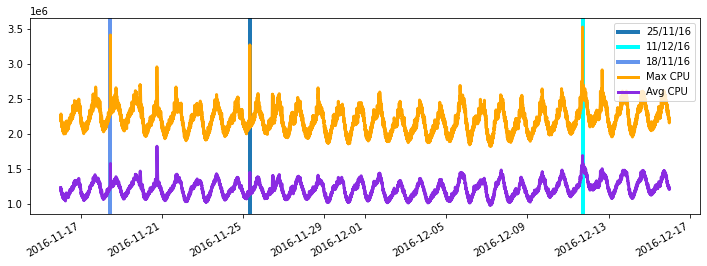

In [7]:
plt.figure(figsize=(12,4))
plt.axvline(x = pd.to_datetime("2016-11-25 7:45:00"), label="25/11/16", linewidth=4) # black friday
plt.axvline(x = pd.to_datetime("2016-12-11 17:15:00"), color = 'aqua', label="11/12/16", linewidth=4)
plt.axvline(x = pd.to_datetime("2016-11-18 10:55:00"), color = 'cornflowerblue', label="18/11/16", linewidth=4)

plt.plot(aggregated_cpu_readings['max cpu'], label='Max CPU', color="orange", linewidth=3)
plt.plot(aggregated_cpu_readings['avg cpu'], label='Avg CPU', color="blueviolet", linewidth=3)
plt.legend(loc="upper right")
plt.gcf().autofmt_xdate()
plt.show()

In [34]:
aggregated_cpu_readings.sort_values(by=['avg cpu'], ascending=False).head()

,avg cpu,max cpu
datetime,,
2016-11-20 17:55:00,1.821756e+06,2.947991e+06
2016-11-20 17:50:00,1.798937e+06,2.958937e+06
2016-11-20 18:00:00,1.763891e+06,2.866113e+06
2016-11-20 18:05:00,1.713989e+06,2.811699e+06
2016-11-20 17:45:00,1.713533e+06,2.865761e+06


### <i> VM Creation & Deletion Distribution </i>

In [12]:
datetime_create = []
datetime_delete = []
no_days_difference = datetime(2016, 11, 16, 0, 0) - datetime(1970, 1, 1, 0, 0) # = 17121
for ind, row in vmtable.iterrows():
    datetime_create.append(datetime.fromtimestamp(row['timestamp vm created']) + timedelta(days=17121))
    datetime_delete.append(datetime.fromtimestamp(row['timestamp vm deleted']) + timedelta(days=17121))
vmtable['datetime_creation'] = datetime_create
vmtable['datetime_deletion'] = datetime_delete
vmtable.head()

,vm id,subscription id,deployment id,timestamp vm created,timestamp vm deleted,max cpu,avg cpu,p95 max cpu,vm category,vm virtual core count,vm memory (gb),lifetime,datetime_creation,datetime_deletion
0,x/XsOfHO4ocsV99i4NluqKDuxctW2MMVmwqOPAlg4wp8mq...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2591700,99.369869,3.424094,10.194309,Delay-insensitive,1,1.75,43195.0,2016-11-16 00:00:00,2016-12-15 23:55:00
1,H5CxmMoVcZSpjgGbohnVA3R+7uCTe/hM2ht2uIYi3t7KwX...,BSXOcywx8pUU0DueDo6UMol1YzR6tn47KLEKaoXp0a1bf2...,3J17LcV4gXjFat62qhVFRfoiWArHnY763HVqqI6orJCfV8...,0,1539300,100.000000,6.181784,33.981360,Interactive,1,0.75,25655.0,2016-11-16 00:00:00,2016-12-03 19:35:00
2,wR/G1YUjpMP4zUbxGM/XJNhYS8cAK3SGKM2tqhF7VdeTUY...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,2188800,2591700,99.569027,3.573635,7.924250,Delay-insensitive,1,1.75,6715.0,2016-12-11 08:00:00,2016-12-15 23:55:00
3,1XiU+KpvIa3T1XP8kk3ZY71Of03+ogFL5Pag9Mc2jBuh0Y...,8u+M3WcFp8pq183WoMB79PhK7xUzbaviOBv0qWN6Xn4mbu...,DHbeI+pYTYFjH8JAF8SewM0z/4SqQctvxcBRGIRglBmeLW...,0,2591700,99.405085,16.287611,95.697890,Delay-insensitive,8,56.00,43195.0,2016-11-16 00:00:00,2016-12-15 23:55:00
4,z5i2HiSaz6ZdLR6PXdnDjGva3jIlkMPXx23VtfXx9q3dXF...,VDU4C8cqdr+ORcqquwMRcsBA2l0SC6lCPys0wdghKROuxP...,Pc2VLB8aDxK2DCC96itq4vW/zVDp4wioAUiB3HoGSFYQ0o...,0,2188500,98.967961,3.036038,9.445484,Delay-insensitive,1,1.75,36475.0,2016-11-16 00:00:00,2016-12-11 07:55:00


In [22]:
weekdays = pd.to_datetime(vmtable["datetime_creation"]).dt.day_name()
m = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekdays =  sorted(weekdays, key=m.index)

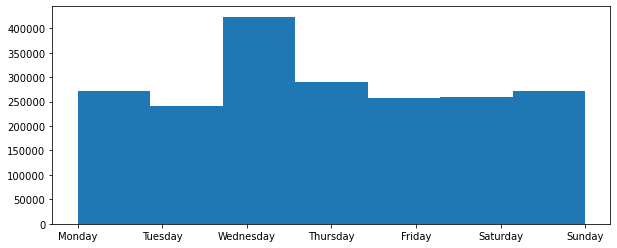

In [23]:
plt.figure(figsize=(10,4))
plt.hist(weekdays, bins=7)
# plt.title("Distribution of VM Start Days")
plt.show()

In [24]:
weekdays = pd.to_datetime(vmtable["datetime_deletion"]).dt.day_name()
m = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekdays =  sorted(weekdays, key=m.index)

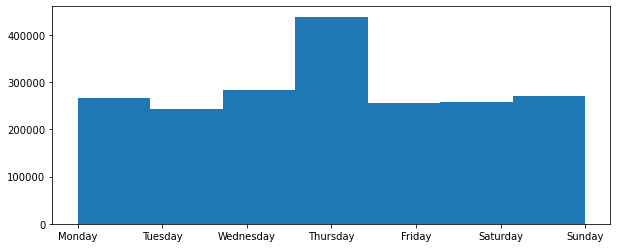

In [25]:
plt.figure(figsize=(10,4))
plt.hist(weekdays, bins=7)
# plt.title("Distribution of VM End Days")
plt.show()

In [17]:
start_hour = pd.to_datetime(vmtable["datetime_creation"]).dt.hour

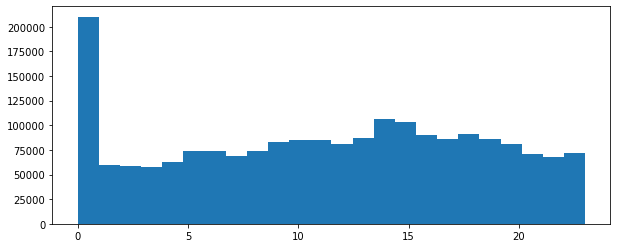

In [26]:
plt.figure(figsize=(10,4))
plt.hist(start_hour, bins=24)
# plt.title("Distribution of VM Start Times")
plt.show()

In [19]:
end_hour = pd.to_datetime(vmtable["datetime_deletion"]).dt.hour

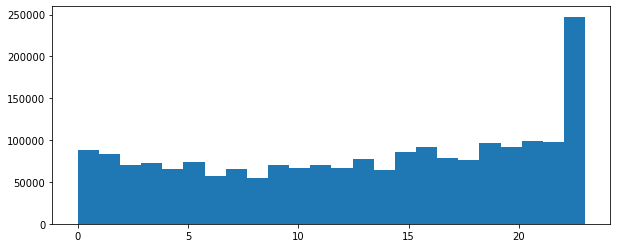

In [27]:
plt.figure(figsize=(10,4))
plt.hist(end_hour, bins=24)
# plt.title("Distribution of VM Finish Times")
plt.show()

#### Percentage Increase in VM deletions at EOD

In [21]:
percent_increase = []
for i in end_hour.value_counts():
    p_inc = ((247436 - i)/i)*100
    percent_increase.append(p_inc)
    
np.mean(percent_increase)

221.20187623678157

### <i>CPU Distribution</i>

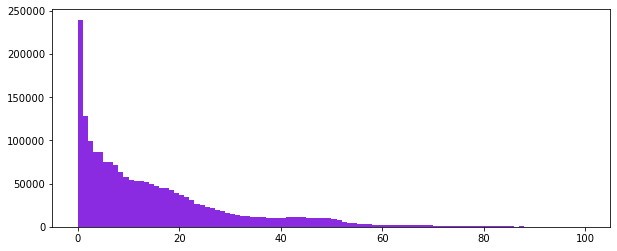

In [29]:
plt.figure(figsize=(10,4))
plt.hist(vmtable["avg cpu"], bins=100, color="blueviolet")
plt.show()

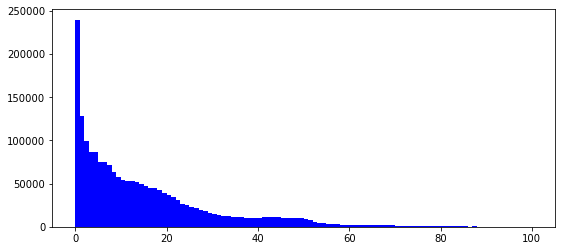

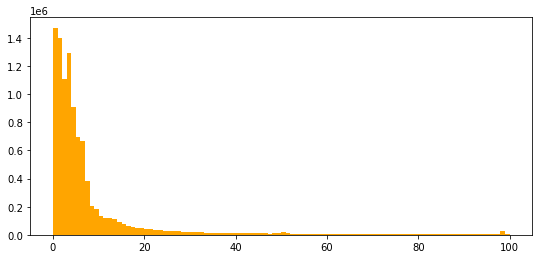

In [58]:
plt.figure(figsize=(9,4))
plt.hist(vmtable["avg cpu"],bins=100, color="b")
plt.show()

plt.figure(figsize=(9,4))
plt.hist(cpu_readings1["avg cpu"],bins=100, color="orange")
plt.show()

<AxesSubplot:ylabel='Frequency'>

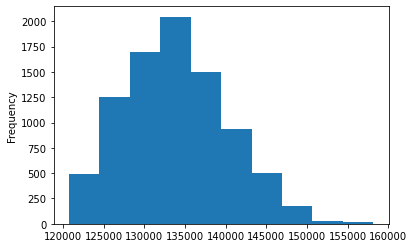

In [62]:
all_data["core count"].plot.hist()

In [63]:
all_data["core count"].describe()

count      8639.000000
mean     133869.210441
std        6251.715525
min      120694.000000
25%      129234.000000
50%      133575.000000
75%      137886.000000
max      158171.000000
Name: core count, dtype: float64

In [7]:
# all_data.to_csv("D:/FYP/AzureDatasetPacking2019/Aggregated Data/all_data.csv")

## Non-normalised data
### <i>Individual Plots</i>

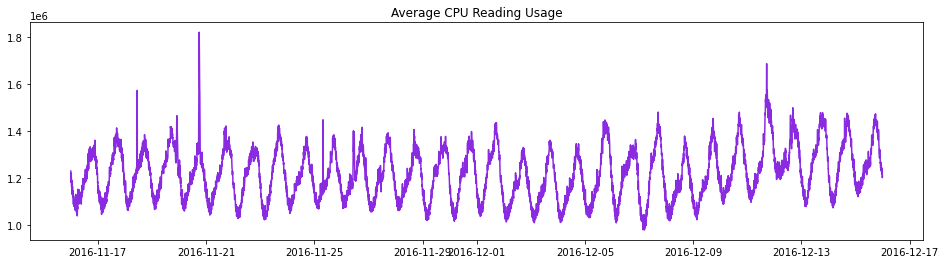

In [13]:
plt.figure(figsize=(16,4))
plt.plot(aggregated_cpu_readings['avg cpu'], label='Average CPU Usage', color="blueviolet")
plt.title("Average CPU Reading Usage")
plt.show()

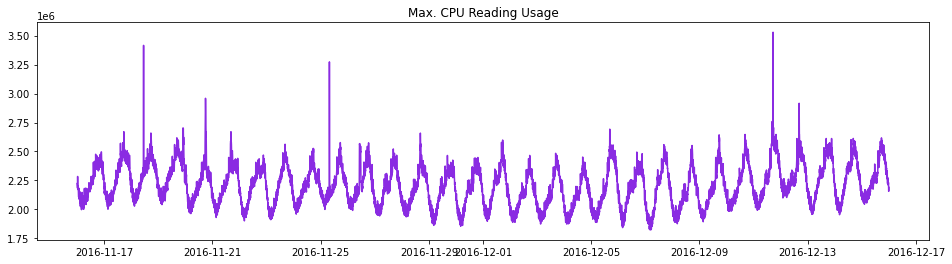

In [14]:
plt.figure(figsize=(16,4))
plt.plot(aggregated_cpu_readings['max cpu'], label='Average CPU Usage', color="blueviolet")
plt.title("Max. CPU Reading Usage")
plt.show()

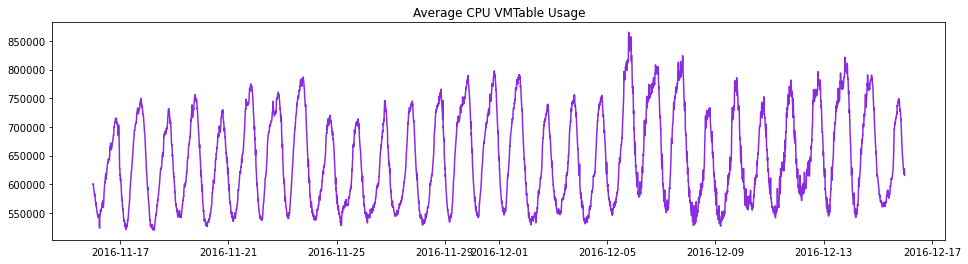

In [15]:
plt.figure(figsize=(16,4))
plt.plot(aggregated_vmtable['avg_cpu'], label='Average  Usage', color="blueviolet")
plt.title("Average CPU VMTable Usage")
plt.show()

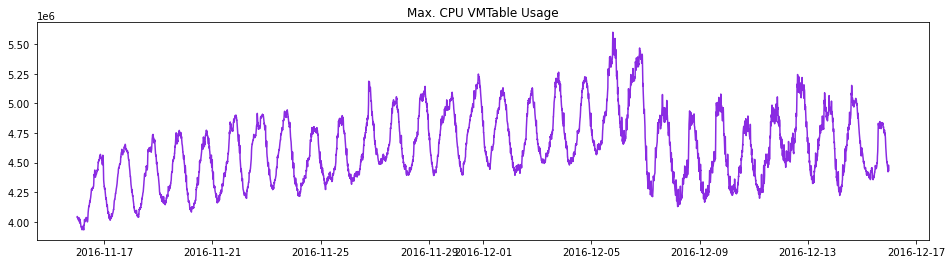

In [16]:
plt.figure(figsize=(16,4))
plt.plot(aggregated_vmtable['max_cpu'], label='Average  Usage', color="blueviolet")
plt.title("Max. CPU VMTable Usage")
plt.show()

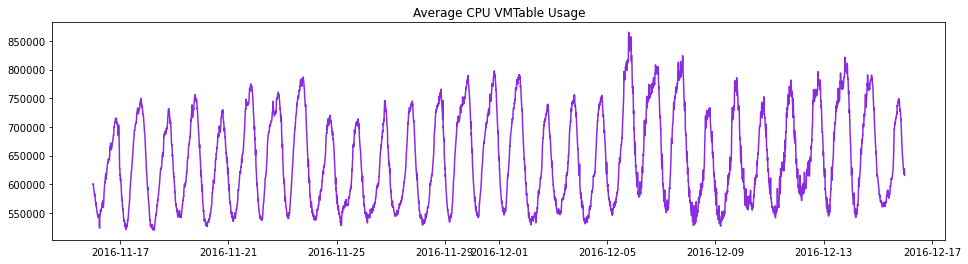

In [17]:
plt.figure(figsize=(16,4))
plt.plot(aggregated_vmtable['avg_cpu'], label='Average  Usage', color="blueviolet")
plt.title("Average CPU VMTable Usage")
plt.show()

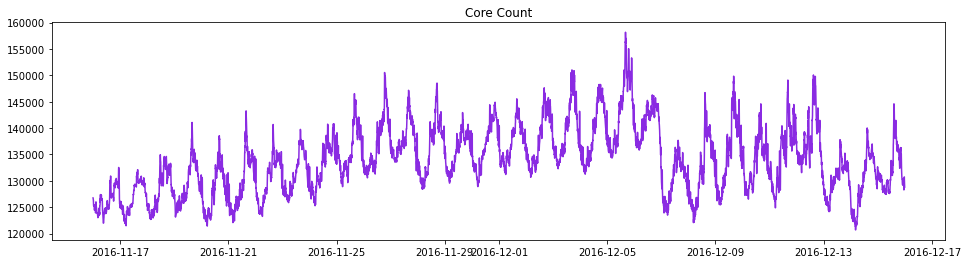

In [18]:
plt.figure(figsize=(16,4))
plt.plot(aggregated_vmtable['vm_virtual_core_count'], color="blueviolet")
plt.title("Core Count")
plt.show()

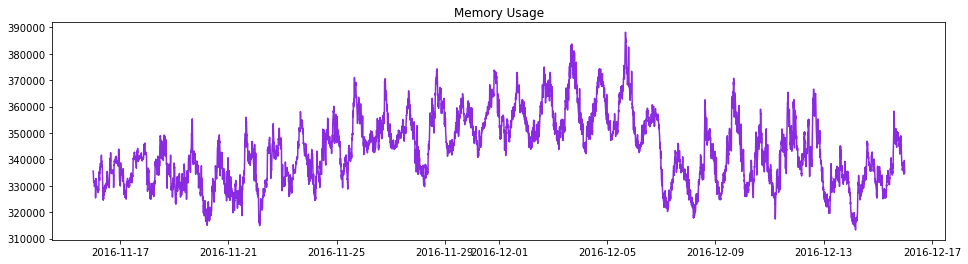

In [19]:
plt.figure(figsize=(16,4))
plt.plot(aggregated_vmtable['vm_memory_gb'], color="blueviolet")
plt.title("Memory Usage")
plt.show()

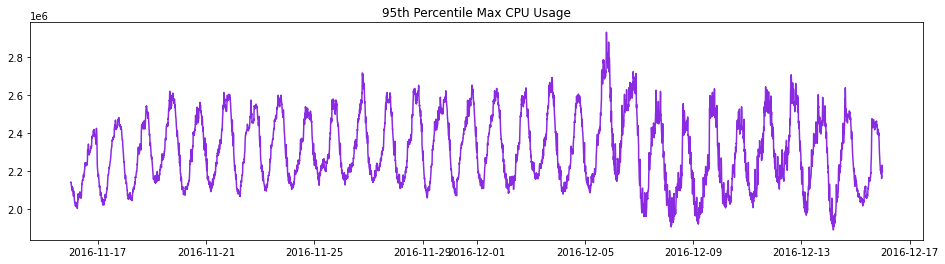

In [20]:
plt.figure(figsize=(16,4))
plt.plot(aggregated_vmtable['p95_max_cpu'], color="blueviolet")
plt.title("95th Percentile Max CPU Usage")
plt.show()

### <i> CPU Reading Observations</i>

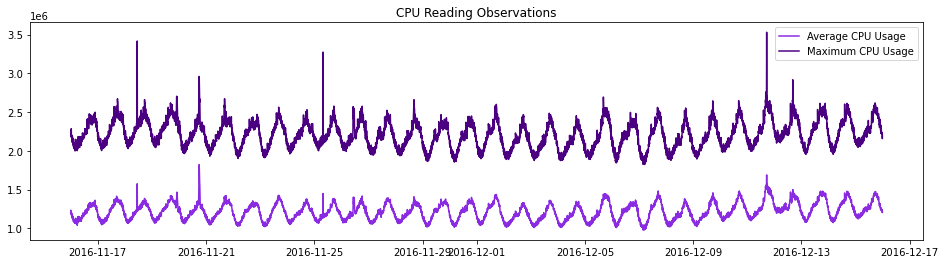

In [22]:
plt.figure(figsize=(16,4))
plt.plot(aggregated_cpu_readings['avg cpu'], label='Average CPU Usage', color="blueviolet")
plt.plot(aggregated_cpu_readings['max cpu'], label='Maximum CPU Usage', color="indigo")
plt.title('CPU Reading Observations')
plt.legend()
plt.show()

### <i> VM Table Observations</i>

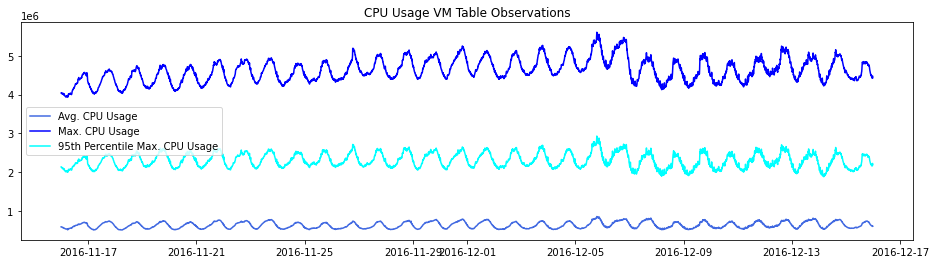

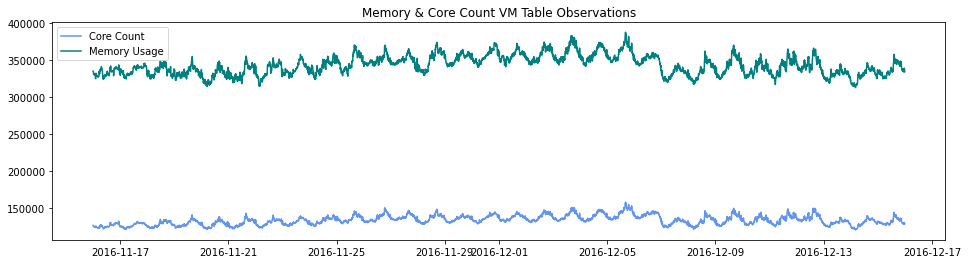

In [23]:
plt.figure(figsize=(16,4))
plt.plot(aggregated_vmtable['avg_cpu'], label='Avg. CPU Usage', color="royalblue")
plt.plot(aggregated_vmtable['max_cpu'], label='Max. CPU Usage', color="b")
plt.plot(aggregated_vmtable['p95_max_cpu'], label='95th Percentile Max. CPU Usage', color="aqua")
plt.title('CPU Usage VM Table Observations')
plt.legend()
plt.show()

plt.figure(figsize=(16,4))

plt.plot(aggregated_vmtable['vm_virtual_core_count'], label='Core Count', color="cornflowerblue")
plt.plot(aggregated_vmtable['vm_memory_gb'], label='Memory Usage', color="teal")
plt.title('Memory & Core Count VM Table Observations')
plt.legend()
plt.show()

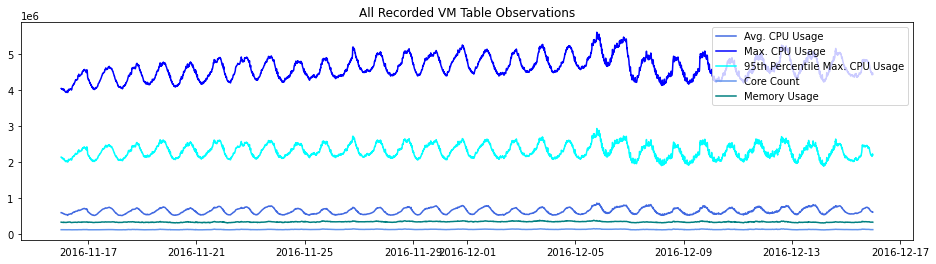

In [24]:
plt.figure(figsize=(16,4))
plt.plot(aggregated_vmtable['avg_cpu'], label='Avg. CPU Usage', color="royalblue")
plt.plot(aggregated_vmtable['max_cpu'], label='Max. CPU Usage', color="b")
plt.plot(aggregated_vmtable['p95_max_cpu'], label='95th Percentile Max. CPU Usage', color="aqua")
plt.plot(aggregated_vmtable['vm_virtual_core_count'], label='Core Count',  color="cornflowerblue")
plt.plot(aggregated_vmtable['vm_memory_gb'], label='Memory Usage',  color="teal")
plt.title('All Recorded VM Table Observations')
plt.legend()
plt.show()

### <i> CPU & VM Table </i>

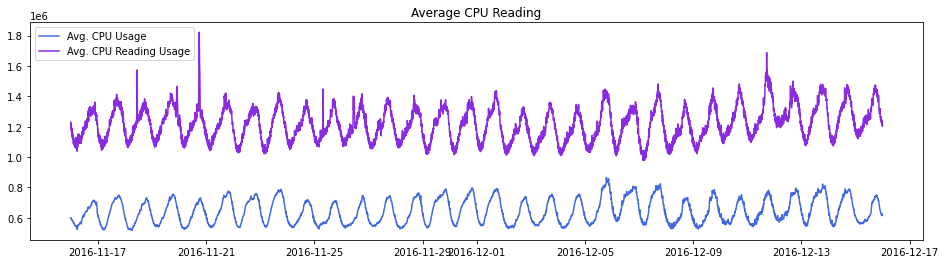

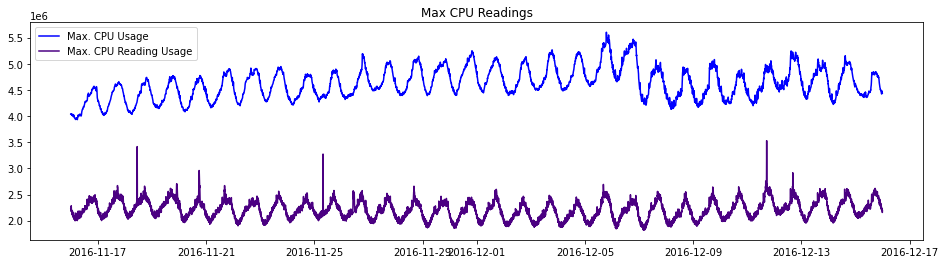

In [25]:
plt.figure(figsize=(16,4))
plt.plot(aggregated_vmtable['avg_cpu'], label='Avg. CPU Usage', color="royalblue")
plt.plot(aggregated_cpu_readings['avg cpu'], label='Avg. CPU Reading Usage', color="blueviolet")
plt.legend()
plt.title("Average CPU Reading")
plt.show()

plt.figure(figsize=(16,4))
plt.plot(aggregated_vmtable['max_cpu'], label='Max. CPU Usage', color="b")
plt.plot(aggregated_cpu_readings['max cpu'], label='Max. CPU Reading Usage', color="indigo")
plt.title('Max CPU Readings')
plt.legend()
plt.show()

### <i> All Observations</i>

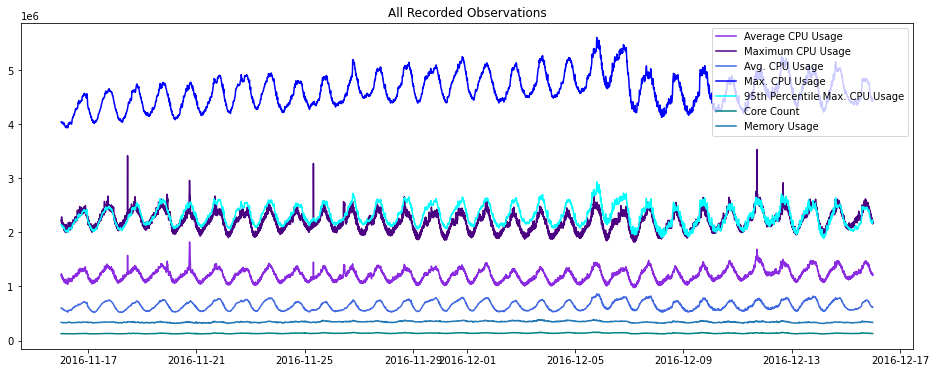

In [26]:
plt.figure(figsize=(16,6))
plt.plot(aggregated_cpu_readings['avg cpu'], label='Average CPU Usage', color="blueviolet")
plt.plot(aggregated_cpu_readings['max cpu'], label='Maximum CPU Usage', color="indigo")
plt.plot(aggregated_vmtable['avg_cpu'], label='Avg. CPU Usage', color="royalblue")
plt.plot(aggregated_vmtable['max_cpu'], label='Max. CPU Usage', color="b")
plt.plot(aggregated_vmtable['p95_max_cpu'], label='95th Percentile Max. CPU Usage', color="aqua")
plt.plot(aggregated_vmtable['vm_virtual_core_count'], label='Core Count', color="teal")
plt.plot(aggregated_vmtable['vm_memory_gb'], label='Memory Usage')
plt.title('All Recorded Observations')
plt.legend()
plt.show()

## Normalised Data Plots

In [9]:
normalised_data = normalised_data.reset_index()
normalised_data['index']= pd.to_datetime(normalised_data['index'])
normalised_data = normalised_data.set_index('index')

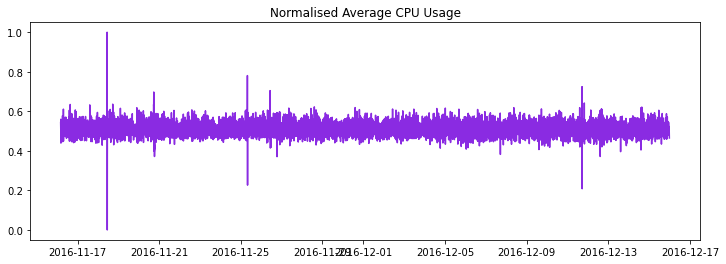

In [10]:
plt.figure(figsize=(12,4))
plt.plot(normalised_data['avg cpu reading'], color="blueviolet")
plt.title('Normalised Average CPU Usage')
plt.show()

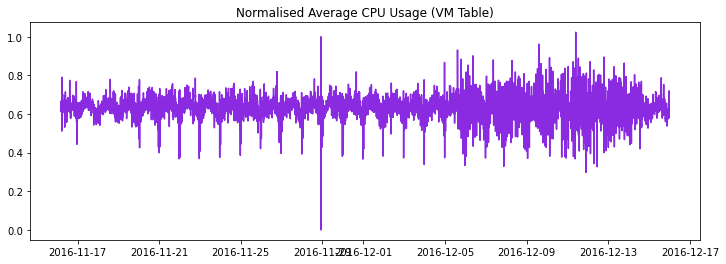

In [14]:
plt.figure(figsize=(12,4))
plt.plot(normalised_data['avg cpu VMTable'], color="blueviolet")
plt.title('Normalised Average CPU Usage (VM Table)')
plt.show()

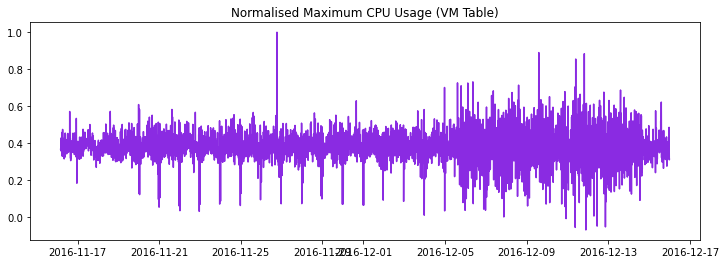

In [15]:
plt.figure(figsize=(12,4))
plt.plot(normalised_data['max cpu VMTable'], color="blueviolet")
plt.title('Normalised Maximum CPU Usage (VM Table)')
plt.show()

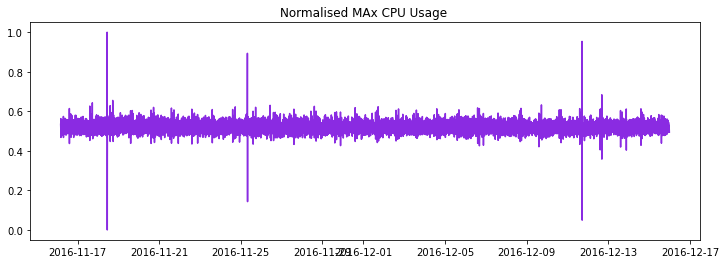

In [19]:
plt.figure(figsize=(12,4))
plt.plot(normalised_data['max cpu reading'], color="blueviolet")
plt.title('Normalised MAx CPU Usage ')
plt.show()

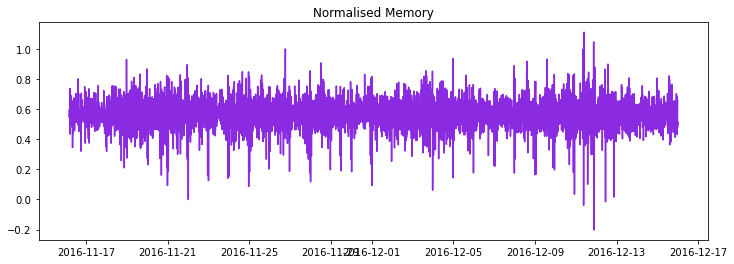

In [17]:
plt.figure(figsize=(12,4))
plt.plot(normalised_data['memory (gb)'], color="blueviolet")
plt.title('Normalised Memory')
plt.show()

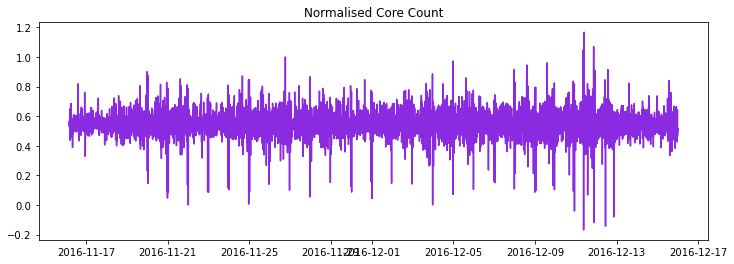

In [18]:
plt.figure(figsize=(12,4))
plt.plot(normalised_data['core count'], color="blueviolet")
plt.title('Normalised Core Count')
plt.show()

### <i> Distribution of Normalised Variables </i>

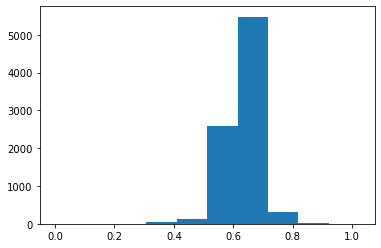

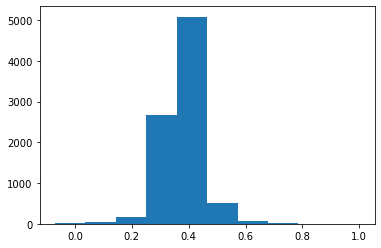

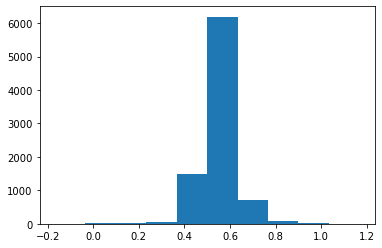

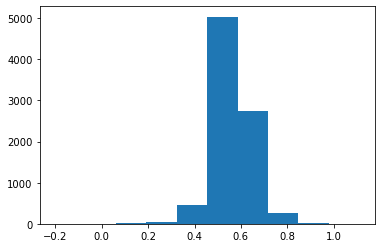

In [74]:
plt.hist(normalised_data["avg cpu VMTable"])
plt.show()

plt.hist(normalised_data["max cpu VMTable"])
plt.show()

plt.hist(normalised_data["core count"])
plt.show()

plt.hist(normalised_data["memory (gb)"])
plt.show()

***